In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn import model_selection

from sklearn.preprocessing import LabelEncoder

# TP - Comparez le comportement du lasso et de la régression ridge

In [3]:
data = pd.read_csv('TP_1_prostate_dataset.csv', sep="\t")
data.head()

,col,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
0,1,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,T
1,2,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,T
2,3,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,T
3,4,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,T
4,5,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,T


**Sélection des features et de la cible :**

In [5]:
X = data.iloc[:, 1:-3]
y = data.iloc[:, -2]

**On standardise les valeurs :**

In [7]:
std_scale = preprocessing.StandardScaler().fit(X)
X_scale = std_scale.transform(X)

In [8]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_scale, y, test_size=0.25 ) # 25% des données dans le jeu de test

In [9]:
X_train = data.iloc[:60,1:-3]
y_train = data.iloc[:60,-2]
X_test = data.iloc[60:,1:-3]
y_test = data.iloc[60:,-2]

**Baseline : une régression linéeaire classique :**

La première étape est d'effectuer une régression linéaire classique afin de récupérer une erreur baseline, qu'on souhaite améliorer à l'aide des techniques de régularisation.

In [11]:
from sklearn import linear_model

lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [12]:
baseline_error = np.mean((lr.predict(X_test) - y_test) **2)
print(baseline_error)

2.8641499657014413


**Application de la régression ridge**

On doit trouver un coefficient de régularisation adapté. Pour rappel, l'objectif est de biaiser un peu la prédiction, afin de diminuer l'erreur standard. 

On appelle ce coefficient alpha, on va en tester un certain nombre afin de trouver celui qui est optimal

In [14]:
n_alphas = 200
alphas = np.logspace(-5, 5, n_alphas)

On peut maintenant tester toute les régressions ridges avec les différentes valeur de l'hyperparamètre α
 . On récupère les poids des différents coefficients de la régression associées ainsi que l'erreur quadratique.

In [16]:
from sklearn.linear_model import Ridge
ridge = linear_model.Ridge()

coefs = []
errors = []
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)
    errors.append([baseline_error, np.mean((ridge.predict(X_test) - y_test) ** 2)])

On peut afficher l'évolution de la valeur des différents poids associés aux paramètres

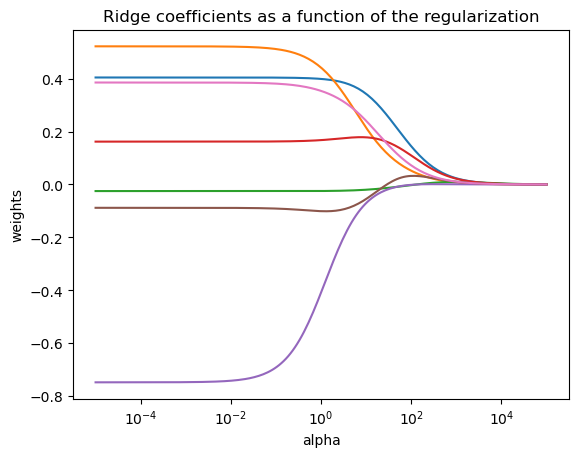

In [18]:
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

Comme on peut le voir (et comme c'était prévu), la valeur de alpha diminue les poids de tous les paramètres de la régression. Etudions maintenant la valeur de l'erreur quadratique

En bleu, c'est la baseline error.

L'erreur ridge est plus petite que la baseline.

Pour effectuer une cross validation de la régression ridge, vous pouvez utiliser la fonction sklearn.linear_model.RidgeCVqui effectue une recherche automatique des hyperparamètres. J'ai ici effectué une recherche manuelle pour le TP.

**Application du Lasso**

On teste aussi un certain nombre d'hyperparamètres pour appliquer le lasso

In [22]:
n_alphas = 300
alphas = np.logspace(-5, 1, n_alphas)
lasso = linear_model.Lasso(fit_intercept=False)

coefs = []
errors = []
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)
    errors.append([baseline_error, np.mean((lasso.predict(X_test) - y_test) ** 2)])

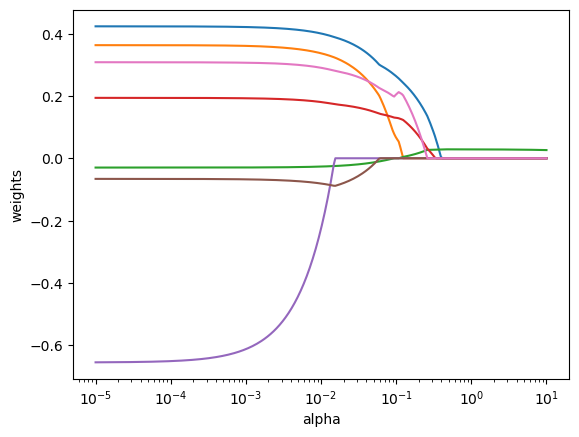

In [23]:
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.axis('tight')
plt.show()

Comme on peut le voir, le lasso permet de supprimer des variables en mettant leur poids à zéro. C'est le cas si deux variables sont corrélées. L'une sera sélectionnée par le Lasso, l'autre supprimée. C'est aussi son avantage par rapport à une régression ridge qui ne fera pas de sélection de variables.

On peut observer maintenant le comportement de l'erreur.

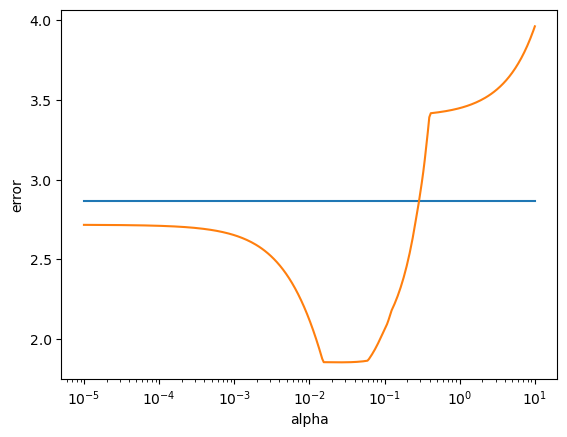

In [25]:
ax = plt.gca()

ax.plot(alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.axis('tight')
plt.show()

In [26]:
min(errors)[1]

1.8531561201728377

On fait encore mieux qu'avec la régression ridge! En effet comme vu dans les chapitres précédents, le lasso a pour avantage de pouvoir sélectionner un sous-ensemble des variables explicatives afin de permettre une meilleur généralisation.

De même, la fonction sklearn.linear_model.LassoCVpermet d'effectuer une recherche des hyperparamètres de manière automatisée

# TP - Entraînez une régression logistique et une SVM linéaire

### Exploration et cleaning des données

In [31]:
data = pd.read_csv('mushrooms.csv', sep=",")
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


**Exploration**

In [33]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [34]:
list_sort = round(data.isna().mean().sort_values() * 100, 2)
print('Pourcentage de valeurs manquantes par colonne')
list_sort

Pourcentage de valeurs manquantes par colonne


class                       0.0
spore-print-color           0.0
ring-type                   0.0
ring-number                 0.0
veil-color                  0.0
veil-type                   0.0
stalk-color-below-ring      0.0
stalk-color-above-ring      0.0
stalk-surface-below-ring    0.0
stalk-surface-above-ring    0.0
population                  0.0
stalk-root                  0.0
gill-color                  0.0
gill-size                   0.0
gill-spacing                0.0
gill-attachment             0.0
odor                        0.0
bruises                     0.0
cap-color                   0.0
cap-surface                 0.0
cap-shape                   0.0
stalk-shape                 0.0
habitat                     0.0
dtype: float64

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [36]:
data.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

In [37]:
data.duplicated().sum()

0

In [38]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


La variable cible est "class". Elle est catégorielle binaire.

In [40]:
data.iloc[:,0].value_counts(normalize=True).round(2)

class
e    0.52
p    0.48
Name: proportion, dtype: float64

<Axes: ylabel='count'>

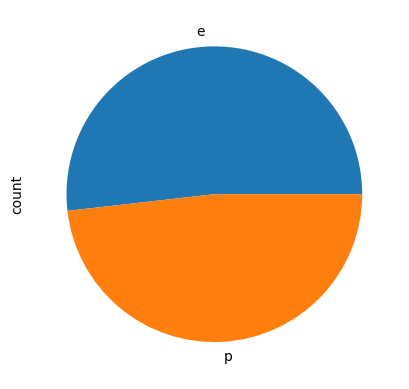

In [41]:
data.iloc[:,0].value_counts().plot(kind='pie')

In [42]:
encoder = LabelEncoder()
for col in data.columns:
    data[col] = encoder.fit_transform(data[col])

Pourquoi utiliser le label encoding n’est pas une très bonne chose? 

Tout d’abord, car comme son nom l’indique le LabelEncoder est plutôt pensé pour encoder la target (les labels). Concernant les features, on peut utiliser, par exemple, un OrdinalEncoder. Mais aussi et surtout car il faut nous poser une question : Existe-t-il un “ordre” dans nos données.

En effet, transformer A, B, C en 1, 2, 3 n'est possible que si A > B > C, autrement dit, si la variable est bien “ordinale”. Si tel n’est pas le cas, il vaut mieux utiliser des transformations telles que le OneHotEncoding.

In [43]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [44]:
data = data.rename(columns={'class': 'target'})
data.head()

,target,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


Suppression de la colonne avec une valeur unique

In [46]:
tmp = data.nunique()
cols = tmp[tmp==1].index
cols

Index(['veil-type'], dtype='object')

In [47]:
data.drop(columns=cols, inplace=True)
data.nunique()

target                       2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

**Export des données nettoyées dans un csv**

In [79]:
data.head()

,target,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


In [81]:
data.to_csv('mushrooms_cleaned.csv', index=False)

### Préparation des données et classifieur naïf

In [97]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix

In [90]:
X = data.drop(columns='target')
y = data.target

In [92]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,2,7,7,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,2,7,7,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,2,7,7,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,2,7,7,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,2,7,7,2,1,0,3,0,1


In [94]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: target, dtype: int32

In [101]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=42) # 30% des données dans le jeu de test

In [103]:
X_train.shape

(5686, 21)

In [105]:
X_test.shape

(2438, 21)

**Dummy classifier - modele naïf**

In [110]:
estimator = DummyClassifier(strategy='most_frequent')
estimator.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

In [112]:
y_pred = estimator.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [114]:
pd.Series(y_pred).value_counts()

0    2438
Name: count, dtype: int64

In [118]:
y_test.value_counts(normalize=True)

target
0    0.515587
1    0.484413
Name: proportion, dtype: float64

In [124]:
train_score = estimator.score(X_train, y_train).round(4)  # accuracy score
test_score = estimator.score(X_test, y_test).round(4)
print("train score :", train_score)
print("test score :", test_score)

train score : 0.519
test score : 0.5156


In [126]:
def score(estimator):
    train_score = estimator.score(X_train, y_train).round(4)
    test_score = estimator.score(X_test, y_test).round(4)
    print("train score :", train_score)
    print("test score :", test_score)

In [128]:
score(estimator)

train score : 0.519
test score : 0.5156


In [145]:
mat = confusion_matrix(y_test, y_pred)
mat

array([[1257,    0],
       [1181,    0]], dtype=int64)

In [147]:
mat = pd.DataFrame(mat)
mat.head()

,0,1
0,1257,0
1,1181,0


In [149]:
mat = pd.DataFrame(mat)
mat.columns = [f'pred_{i}' for i in mat.columns]
mat.index = [f'test_{i}' for i in mat.index]
mat.head()

,pred_0,pred_1
test_0,1257,0
test_1,1181,0


In [151]:
def confusion(y_test, y_pred):
    mat = confusion_matrix(y_test, y_pred)
    mat = pd.DataFrame(mat)
    mat.columns = [f'pred_{i}' for i in mat.columns]
    mat.index = [f'test_{i}' for i in mat.index]
    mat.head()
    return mat    

In [153]:
confusion(y_test, y_pred)

,pred_0,pred_1
test_0,1257,0
test_1,1181,0


In [155]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5

### Regression logistique

In [162]:
from sklearn.linear_model import LogisticRegression

In [164]:
estimator = LogisticRegression(solver='liblinear')
estimator.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [166]:
y_pred = estimator.predict(X_test)
y_pred

array([0, 1, 1, ..., 1, 0, 0])

In [176]:
y_prob = estimator.predict_proba(X_test).round(2)
y_prob

array([[1.  , 0.  ],
       [0.09, 0.91],
       [0.  , 1.  ],
       ...,
       [0.09, 0.91],
       [1.  , 0.  ],
       [0.96, 0.04]])

In [172]:
score(estimator)

train score : 0.9488
test score : 0.9491


Le score est mieux que le modèle nai avec dummy.

In [180]:
confusion(y_test, y_pred)

,pred_0,pred_1
test_0,1201,56
test_1,68,1113


In [183]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9489355797205421

### SVM

In [186]:
from sklearn.svm import LinearSVC

In [198]:
estimator = LinearSVC()
estimator.fit(X_train, y_train)

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [200]:
y_pred = estimator.predict(X_test)
y_pred

array([0, 1, 1, ..., 1, 0, 0])

In [202]:
score(estimator)

train score : 0.9525
test score : 0.9545


In [194]:
confusion(y_test, y_pred)

,pred_0,pred_1
test_0,1198,59
test_1,74,1107


In [204]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9545417802558003

### Optimisation des modèles

**Régression logisitique**

In [209]:
from sklearn.model_selection import GridSearchCV

In [216]:
estimator = LogisticRegression()

params = { 'C': np.logspace(-3, 3, 7),
           'penalty': ['l1', 'l2'],
           'solver': ['newton-cg', 'lbfgs', 'liblinear']
         }

In [220]:
grid = GridSearchCV(estimator,
                     params,
                     cv=10,
                     n_jobs=-1,   # pour le forcer à travailler sur l'ensemble des CPU de la mchine
                     return_train_score=True,
                     verbose=1)
grid.fit(X_train, y_train)

Fitting 10 folds for each of 42 candidates, totalling 420 fits


C:\Users\admin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
140 fits failed out of a total of 420.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\admin\anaconda3\Lib\site-packages\sklearn\linear_model\_

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             return_train_score=True, verbose=1)

In [222]:
best_params = grid.best_params_
best_params

{'C': 1000.0, 'penalty': 'l2', 'solver': 'newton-cg'}

In [224]:
res = grid.cv_results_
res

{'mean_fit_time': array([4.46949005e-03, 1.83875561e-03, 4.17403221e-02, 2.24738050e-01,
        9.23838139e-02, 8.21218491e-02, 3.68864536e-03, 2.20727921e-03,
        2.30273175e-01, 3.32404804e-01, 3.04066062e-01, 2.15476513e-01,
        5.50265312e-03, 5.13045788e-03, 6.87930942e-01, 4.56964517e-01,
        2.69292259e-01, 2.61130667e-01, 4.02905941e-03, 7.50644207e-03,
        1.41879107e+01, 5.11057281e-01, 2.30852580e-01, 4.43403959e-01,
        4.95233536e-03, 2.46784687e-03, 1.89440148e+01, 8.76051617e-01,
        2.45026708e-01, 5.97569299e-01, 4.31823730e-03, 4.76796627e-03,
        2.17207122e+01, 1.35185223e+00, 2.60497451e-01, 8.41416359e-01,
        4.29513454e-03, 5.14447689e-03, 2.05123738e+01, 2.03750646e+00,
        3.80880070e-01, 1.06491449e+00]),
 'std_fit_time': array([3.15713433e-03, 2.01009079e-03, 5.90143649e-03, 5.66088931e-02,
        9.04821804e-03, 1.09061212e-02, 3.30029079e-03, 1.42044320e-03,
        5.96296029e-02, 8.98010140e-02, 7.96791101e-02, 5.908

In [226]:
res = pd.DataFrame(res)
res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.004469,0.003157,0.000000,0.000000,0.001,l1,newton-cg,"{'C': 0.001, 'penalty': 'l1', 'solver': 'newto...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.001839,0.002010,0.000000,0.000000,0.001,l1,lbfgs,"{'C': 0.001, 'penalty': 'l1', 'solver': 'lbfgs'}",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.041740,0.005901,0.020686,0.014220,0.001,l1,liblinear,"{'C': 0.001, 'penalty': 'l1', 'solver': 'libli...",0.755712,0.789104,...,0.772718,0.771546,0.769201,0.769982,0.772177,0.771981,0.769050,0.774521,0.771368,0.001781
3,0.224738,0.056609,0.007569,0.002558,0.001,l2,newton-cg,"{'C': 0.001, 'penalty': 'l2', 'solver': 'newto...",0.873462,0.899824,...,0.880399,0.880790,0.878640,0.880594,0.881008,0.881399,0.880227,0.881204,0.880330,0.001055
4,0.092384,0.009048,0.006206,0.001819,0.001,l2,lbfgs,"{'C': 0.001, 'penalty': 'l2', 'solver': 'lbfgs'}",0.873462,0.899824,...,0.880399,0.880790,0.878640,0.880594,0.881008,0.881399,0.880227,0.881204,0.880330,0.001055


In [228]:
cols = [i for i in res.columns if 'split' not in i]
cols

['mean_fit_time',
 'std_fit_time',
 'mean_score_time',
 'std_score_time',
 'param_C',
 'param_penalty',
 'param_solver',
 'params',
 'mean_test_score',
 'std_test_score',
 'rank_test_score',
 'mean_train_score',
 'std_train_score']

In [230]:
res = res[cols]
res = res.sort_values('rank_test_score')
res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
39,2.037506,0.501360,0.013830,0.005890,1000.0,l2,newton-cg,"{'C': 1000.0, 'penalty': 'l2', 'solver': 'newt...",0.960427,0.012621,1,0.961993,0.003726
38,20.512374,2.335514,0.007272,0.002576,1000.0,l1,liblinear,"{'C': 1000.0, 'penalty': 'l1', 'solver': 'libl...",0.960252,0.012592,2,0.961465,0.003608
41,1.064914,0.105008,0.008676,0.002664,1000.0,l2,liblinear,"{'C': 1000.0, 'penalty': 'l2', 'solver': 'libl...",0.960251,0.012445,3,0.961856,0.003656
32,21.720712,1.592622,0.008963,0.003415,100.0,l1,liblinear,"{'C': 100.0, 'penalty': 'l1', 'solver': 'libli...",0.959900,0.012533,4,0.961387,0.003558
33,1.351852,0.173066,0.007334,0.002880,100.0,l2,newton-cg,"{'C': 100.0, 'penalty': 'l2', 'solver': 'newto...",0.959900,0.012461,5,0.961289,0.003506


In [240]:
def resultsize(grid):
    best_params = grid.best_params_
    print('best_params :', best_params)

    res = grid.cv_results_
    res = pd.DataFrame(res)
    cols = [i for i in res.columns if 'split' not in i]
    res = res[cols]
    res = res.sort_values('rank_test_score')

    return res

In [242]:
resultsize(grid).head(10)

best_params : {'C': 1000.0, 'penalty': 'l2', 'solver': 'newton-cg'}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
39,2.037506,0.501360,0.013830,0.005890,1000.0,l2,newton-cg,"{'C': 1000.0, 'penalty': 'l2', 'solver': 'newt...",0.960427,0.012621,1,0.961993,0.003726
38,20.512374,2.335514,0.007272,0.002576,1000.0,l1,liblinear,"{'C': 1000.0, 'penalty': 'l1', 'solver': 'libl...",0.960252,0.012592,2,0.961465,0.003608
41,1.064914,0.105008,0.008676,0.002664,1000.0,l2,liblinear,"{'C': 1000.0, 'penalty': 'l2', 'solver': 'libl...",0.960251,0.012445,3,0.961856,0.003656
32,21.720712,1.592622,0.008963,0.003415,100.0,l1,liblinear,"{'C': 100.0, 'penalty': 'l1', 'solver': 'libli...",0.959900,0.012533,4,0.961387,0.003558
33,1.351852,0.173066,0.007334,0.002880,100.0,l2,newton-cg,"{'C': 100.0, 'penalty': 'l2', 'solver': 'newto...",0.959900,0.012461,5,0.961289,0.003506
26,18.944015,3.437522,0.006493,0.002450,10.0,l1,liblinear,"{'C': 10.0, 'penalty': 'l1', 'solver': 'liblin...",0.959372,0.012552,6,0.961172,0.003475
35,0.841416,0.142250,0.008782,0.008273,100.0,l2,liblinear,"{'C': 100.0, 'penalty': 'l2', 'solver': 'libli...",0.959020,0.012593,7,0.960859,0.003636
40,0.380880,0.066678,0.012326,0.008704,1000.0,l2,lbfgs,"{'C': 1000.0, 'penalty': 'l2', 'solver': 'lbfgs'}",0.953744,0.010445,8,0.955603,0.002327
27,0.876052,0.072024,0.006537,0.002080,10.0,l2,newton-cg,"{'C': 10.0, 'penalty': 'l2', 'solver': 'newton...",0.953744,0.011106,9,0.954958,0.002697
34,0.260497,0.023432,0.009227,0.005880,100.0,l2,lbfgs,"{'C': 100.0, 'penalty': 'l2', 'solver': 'lbfgs'}",0.953569,0.010878,10,0.955896,0.002976


In [244]:
estimator = LogisticRegression(penalty='l2', C=1000, solver='liblinear')
estimator

LogisticRegression(C=1000, solver='liblinear')

In [246]:
# Asutce
estimator = LogisticRegression(**best_params)
estimator

LogisticRegression(C=1000.0, solver='newton-cg')

In [248]:
estimator.fit(X_train, y_train)

y_pred = estimator.predict(X_test)
y_pred

array([0, 1, 1, ..., 1, 0, 0])

In [250]:
score(estimator)

train score : 0.962
test score : 0.9627


In [252]:
confusion(y_test, y_pred)

,pred_0,pred_1
test_0,1211,46
test_1,45,1136


In [254]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9626508150462405

**SVM**

In [259]:
estimator = LinearSVC()

params = { 'C': np.logspace(-3, 3, 7)}

In [261]:
grid = GridSearchCV(estimator,
                     params,
                     cv=10,
                     n_jobs=-1,   # pour le forcer à travailler sur l'ensemble des CPU de la mchine
                     return_train_score=True,
                     verbose=1)
grid.fit(X_train, y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


C:\Users\admin\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


GridSearchCV(cv=10, estimator=LinearSVC(), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
             return_train_score=True, verbose=1)

In [263]:
print(grid.best_params_)

{'C': 0.1}


In [265]:
resultsize(grid).head()

best_params : {'C': 0.1}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
2,1.560399,0.197329,0.004344,0.007170,0.1,{'C': 0.1},0.945654,0.008276,1,0.947493,0.001389
3,1.417186,0.089230,0.004690,0.005925,1.0,{'C': 1.0},0.945302,0.009660,2,0.946672,0.004621
6,1.582936,0.346281,0.003985,0.007022,1000.0,{'C': 1000.0},0.942840,0.010541,3,0.945871,0.006964
1,0.232882,0.073477,0.013954,0.012515,0.01,{'C': 0.01},0.936686,0.006242,4,0.938230,0.002168
4,1.556354,0.116958,0.002894,0.005157,10.0,{'C': 10.0},0.919295,0.068022,5,0.921306,0.065607


In [271]:
estimator = LinearSVC(**grid.best_params_)
estimator

LinearSVC(C=0.1)

In [273]:
estimator.fit(X_train, y_train)

y_pred = estimator.predict(X_test)
y_pred

array([0, 1, 1, ..., 1, 0, 0])

In [275]:
score(estimator)

train score : 0.9467
test score : 0.9491


In [277]:
confusion(y_test, y_pred)

,pred_0,pred_1
test_0,1205,52
test_1,72,1109


In [279]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9488331895155124

# TP final - Entraînez-vous à classer automatiquement des feuilles d’arbres

In [283]:
data = pd.read_csv('Dataset_feuilles_1.csv', sep=",")
data.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [285]:
data.shape

(990, 194)

In [295]:
data.columns

Index(['id', 'species', 'margin1', 'margin2', 'margin3', 'margin4', 'margin5',
       'margin6', 'margin7', 'margin8',
       ...
       'texture55', 'texture56', 'texture57', 'texture58', 'texture59',
       'texture60', 'texture61', 'texture62', 'texture63', 'texture64'],
      dtype='object', length=194)

### Utiliser une baseline de performance avec le KNN

In [290]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
estimator = KNeighborsClassifier()

